<a href="https://colab.research.google.com/github/dyddnekt1/Data_Science/blob/master/HW2_2015410120_%EA%B9%80%EC%9A%A9%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2020-05-16 오후 5시 55분에 실행했습니다.

## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

### CHECK YOUR PYTHON VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [0]:
import sys
sys.version

'3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'

# HW2 - Data Scraping & Taste of Data Analysis

#### Data Science in Korea University
#### COSE471, Spring 2020
#### Due : 5/17 (SUN)  11:59 PM 

## Fetching coronavirus-19(COVID-19) pandemic data from Wikipedia

In this example we will fetch data about countries and their COVID-19 from Wikipedia.

https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic has several tables for individual countries, subcontinents as well as timelines. 


###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

In [0]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## 0. Fetching the Wikipedia site

#### print html code of presented page



> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>2019–20 coronavirus pandemic by country and territory - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

##### Use requests library


In [0]:
url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory'
###YOUR CODE HERE###
html = requests.get(url)
soup = BeautifulSoup(html.text)

print(soup)

## 1. Parsing html data

Data that we are going to use is table titled below:

#### Title: 2019–20 coronavirus pandemic by country and territory

*print html code of parsed table: 2019–20 coronavirus pandemic by country and territory*

> *`<table ... id="thetable">`*<br/>
> *`<tr>`*<br/>
> *`<th>#</th>`*<br/>
> *`<th>Countries and territories</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

##### Use BeautifulSoup
*hint: class/id can be assigned for elements of html.


In [0]:
"""Parse html and return html tables of wikipedia coronavirus_pandemic data."""

#step1: look at html source!"
#step2: get all tables"
#step3: get table we care about"
    
###YOUR CODE HERE###
tables = soup.find_all('table', {'id':'thetable'})
table = tables[0]

print(table)

## 2. Extracting data and filling it into a dictionary(Python data stucture)

#### Extract COVID-19 data for countries from table and store it in dictionary.
*Please print parsed dictionary at the end of code*

##### Shape of Dictionary
- { 'country_name': { 'cases' : 'num', 'deaths' : 'num', 'recovers' : 'num' }}
- *Dictionary data structure does not have order between Keys, so it may show up in different order(index).  You don't need to be worried of it*
- e.g. 'Uzbekistan': {'cases': '2,017', 'deaths': '9', 'recovers': '1,096'}, 'Puerto Rico': {'cases': '1,539', 'deaths': '92', 'recovers': '—'} ...

In [0]:
# extract headings and actual data and combine data into single dict
###YOUR CODE HERE###
def parseInt(s):
  try:
    ret = int(s.replace(',',''))
  except:
    return -1
  else:
    return ret

datas = table.find_all('tr')
datas = datas[2:-2]

dict = {}
for data in datas:
  country_name = data.find('a').text
  numbers = data.find_all('td')
  cases = parseInt(numbers[0].text)
  deaths = parseInt(numbers[1].text)
  recovers = parseInt(numbers[2].text)
  dict[country_name] = {'cases':cases,'deaths':deaths,'recovers':recovers}

print(dict)

{'United States': {'cases': 1472743, 'deaths': 88199, 'recovers': 259834}, 'Russia': {'cases': 262843, 'deaths': 2418, 'recovers': 58226}, 'United Kingdom': {'cases': 236711, 'deaths': 33998, 'recovers': -1}, 'Spain': {'cases': 230183, 'deaths': 27459, 'recovers': 144783}, 'Italy': {'cases': 223885, 'deaths': 31610, 'recovers': 120205}, 'Brazil': {'cases': 219258, 'deaths': 14929, 'recovers': 84970}, 'Germany': {'cases': 175699, 'deaths': 8001, 'recovers': 151700}, 'Turkey': {'cases': 146457, 'deaths': 4055, 'recovers': 106133}, 'France': {'cases': 141919, 'deaths': 27529, 'recovers': 60448}, 'Iran': {'cases': 116635, 'deaths': 6902, 'recovers': 91836}, 'Peru': {'cases': 84495, 'deaths': 2392, 'recovers': 27147}, 'China': {'cases': 82933, 'deaths': 4633, 'recovers': 78209}, 'India': {'cases': 81970, 'deaths': 2649, 'recovers': 27920}, 'Canada': {'cases': 74613, 'deaths': 5562, 'recovers': 36895}, 'Belgium': {'cases': 54644, 'deaths': 8959, 'recovers': 14301}, 'Saudi Arabia': {'cases': 

## 3. Creating a dataframe(Python data structure) from a dictionary

* Shape of dataframe must be like following table.
* i.e. indices: country_name, columns: cases, deaths, recovers
<table>
  <tr>
    <th></th>
    <th>cases</th>
    <th>deaths</th>
    <th>recovers</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>1,095,645</td>
    <td>63,746</td>
    <td>132,544</td>
  </tr>
  <tr>
    <td>Spain</td>
    <td>213,435</td>
    <td>24,543</td>
    <td>112,050</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Saint Pierre & Miquelon</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
</table>

In [0]:
#step1: create dataframe(indices: country_name, columns: cases, deaths, recovers)
#step2: replace '—' to 0

###YOUR CODE HERE###
# Use the following code
df = pd.DataFrame.from_dict(dict, orient='index')
df = df.replace(-1, 0)
print(df)

                           cases  deaths  recovers
United States            1472743   88199    259834
Russia                    262843    2418     58226
United Kingdom            236711   33998         0
Spain                     230183   27459    144783
Italy                     223885   31610    120205
...                          ...     ...       ...
Bonaire                        2       0         2
Saba                           2       0         2
Sint Eustatius                 2       0         2
Lesotho                        1       0         0
Saint Pierre & Miquelon        1       0         1

[228 rows x 3 columns]


## 4-1. Adding some data(death rates) from the original dataframe

* Calculate death rates by 'deaths/cases'
* Add the death rates column to original data frame named 'death_rates'
* Decimal place of death rates is two. i.e. 0.26

<table>
  <tr>
    <th></th>
    <th>cases</th>
    <th>deaths</th>
    <th>recovers</th>
    <th>death_rates</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>1095645</td>
    <td>63746</td>
    <td>132544</td>
    <td>0.06</td>
  </tr>
  <tr>
    <td>Spain</td>
    <td>213435</td>
    <td>24543</td>
    <td>112050</td>
    <td>0.11</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Saint Pierre & Miquelon</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0.00</td>
  </tr>
</table>

In [0]:
#step1: calculate death rates(to calculate death rates, strings in dataframe should be converted to numeric datas)
#step2: add "death_rates" column to dataframe 
#step3: sort based on death rates 

###YOUR CODE HERE###
pd.options.display.float_format = '{:.2f}'.format

df['death_rates'] = df['deaths'] / df['cases']
df = df.sort_values('death_rates', ascending = False)
print(df)

                          cases  deaths  recovers  death_rates
Nicaragua                    25       8         7         0.32
MS Zaandam                   13       4         0         0.31
Sint Maarten                 77      15        54         0.19
France                   141919   27529     60448         0.19
Coral Princess               12       2         0         0.17
...                         ...     ...       ...          ...
New Caledonia                18       0        18         0.00
Saint Lucia                  18       0        18         0.00
Gibraltar                   147       0       144         0.00
Saint Vincent                17       0        14         0.00
Saint Pierre & Miquelon       1       0         1         0.00

[228 rows x 4 columns]


## 5-1. Print top 5 countries with the highest/lowest death rates by COVID-19. (total 10 countries)

In [0]:
###YOUR CODE HERE###
# highest 5
print(df.head(5))
# lowest 5
print(df.tail(5))

                 cases  deaths  recovers  death_rates
Nicaragua           25       8         7         0.32
MS Zaandam          13       4         0         0.31
Sint Maarten        77      15        54         0.19
France          141919   27529     60448         0.19
Coral Princess      12       2         0         0.17
                         cases  deaths  recovers  death_rates
New Caledonia               18       0        18         0.00
Saint Lucia                 18       0        18         0.00
Gibraltar                  147       0       144         0.00
Saint Vincent               17       0        14         0.00
Saint Pierre & Miquelon      1       0         1         0.00


## 5-2. Create a sub-dataframe for the five countries extracted in question 5-1(highest case).

<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l">cases</th>
    <th class="tg-yw4l">deaths</th>
    <th class="tg-baqh">recovers</th>
    <th class="tg-yw4l">death_rates</th>
  </tr>
  <tr>
    <td class="tg-yw4l">Nicaragua</td>
    <td class="tg-yw4l">25</td>
    <td class="tg-yw4l">8</td>
    <td class="tg-yw4l">7</td>
    <td class="tg-yw4l">0.32</td>
  </tr>
  <tr>
    <td class="tg-yw4l">MS Zaandam</td>
    <td class="tg-yw4l">13</td>
    <td class="tg-yw4l">4</td>
    <td class="tg-yw4l">0</td>
    <td class="tg-yw4l">0.31</td>
  </tr>
  <tr>
    <td class="tg-baqh">Sint Maarten</td>
    <td class="tg-yw4l">77</td>
    <td class="tg-yw4l">15</td>
    <td class="tg-yw4l">54</td>
    <td class="tg-yw4l">0.19</td>
  </tr>
  <tr>
    <td class="tg-yw4l">France</td>
    <td class="tg-yw4l">141919</td>
    <td class="tg-yw4l">27529</td>
    <td class="tg-yw4l">60448</td>
    <td class="tg-yw4l">0.19</td>
  </tr>
  <tr>
    <td class="tg-yw4l">Coral Princess</td>
    <td class="tg-yw4l">12</td>
    <td class="tg-yw4l">2</td>
    <td class="tg-yw4l">0</td>
    <td class="tg-yw4l">0.17</td>
  </tr>
</table>

## 5-3. Plot Grouped bar chart with labels using dataframe that created from problem 5-2.

Text(0.5, 1.0, 'number of patients by contry')

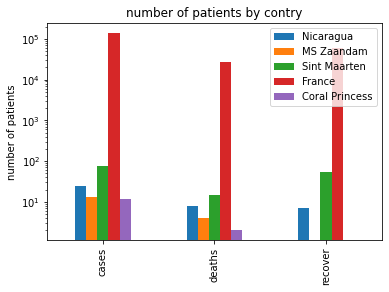

In [0]:
###YOUR CODE HERE###
# Use the following code(you can use log scale for better visualize)
labels = ['Nicaragua', 'MS Zaandam', 'Sint Maarten', 'France', 'Coral Princess']
cases = [25, 13, 77, 141919, 12]
deaths = [8, 4, 15, 27529, 2]
recovers = [7, 0, 54, 60448, 0]

subdf = pd.DataFrame([cases, deaths, recovers], columns=labels, index=['cases', 'deaths', 'recover'])
ax = subdf.plot(kind = 'bar')
ax.set_yscale('log')
ax.set_ylabel('number of patients')
ax.set_title('number of patients by contry')